In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
# Example dataset: Keywords extracted from news articles or social media posts
data = [
    ["Bitcoin", "Cryptocurrency", "Investment"],
    ["Stocks", "Market", "Trading"],
    ["Economy", "Recession", "Stimulus"],
    ["Technology", "Innovation", "Startups"],
    ["Real Estate", "Property", "Housing"]
]

In [4]:
# Transaction Encoder to convert data into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Applying Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

In [5]:
# Displaying frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
    support                               itemsets
0       0.2                              (Bitcoin)
1       0.2                       (Cryptocurrency)
2       0.2                              (Economy)
3       0.2                              (Housing)
4       0.2                           (Innovation)
5       0.2                           (Investment)
6       0.2                               (Market)
7       0.2                             (Property)
8       0.2                          (Real Estate)
9       0.2                            (Recession)
10      0.2                             (Startups)
11      0.2                             (Stimulus)
12      0.2                               (Stocks)
13      0.2                           (Technology)
14      0.2                              (Trading)
15      0.2              (Bitcoin, Cryptocurrency)
16      0.2                  (Bitcoin, Investment)
17      0.2           (Cryptocurrency, Investment)
18      0.2 

In [6]:
# Displaying association rules
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


Association Rules:
                     antecedents                   consequents  support  \
0                      (Bitcoin)              (Cryptocurrency)      0.2   
1               (Cryptocurrency)                     (Bitcoin)      0.2   
2                      (Bitcoin)                  (Investment)      0.2   
3                   (Investment)                     (Bitcoin)      0.2   
4               (Cryptocurrency)                  (Investment)      0.2   
5                   (Investment)              (Cryptocurrency)      0.2   
6                    (Recession)                     (Economy)      0.2   
7                      (Economy)                   (Recession)      0.2   
8                     (Stimulus)                     (Economy)      0.2   
9                      (Economy)                    (Stimulus)      0.2   
10                    (Property)                     (Housing)      0.2   
11                     (Housing)                    (Property)      0.2   
12   

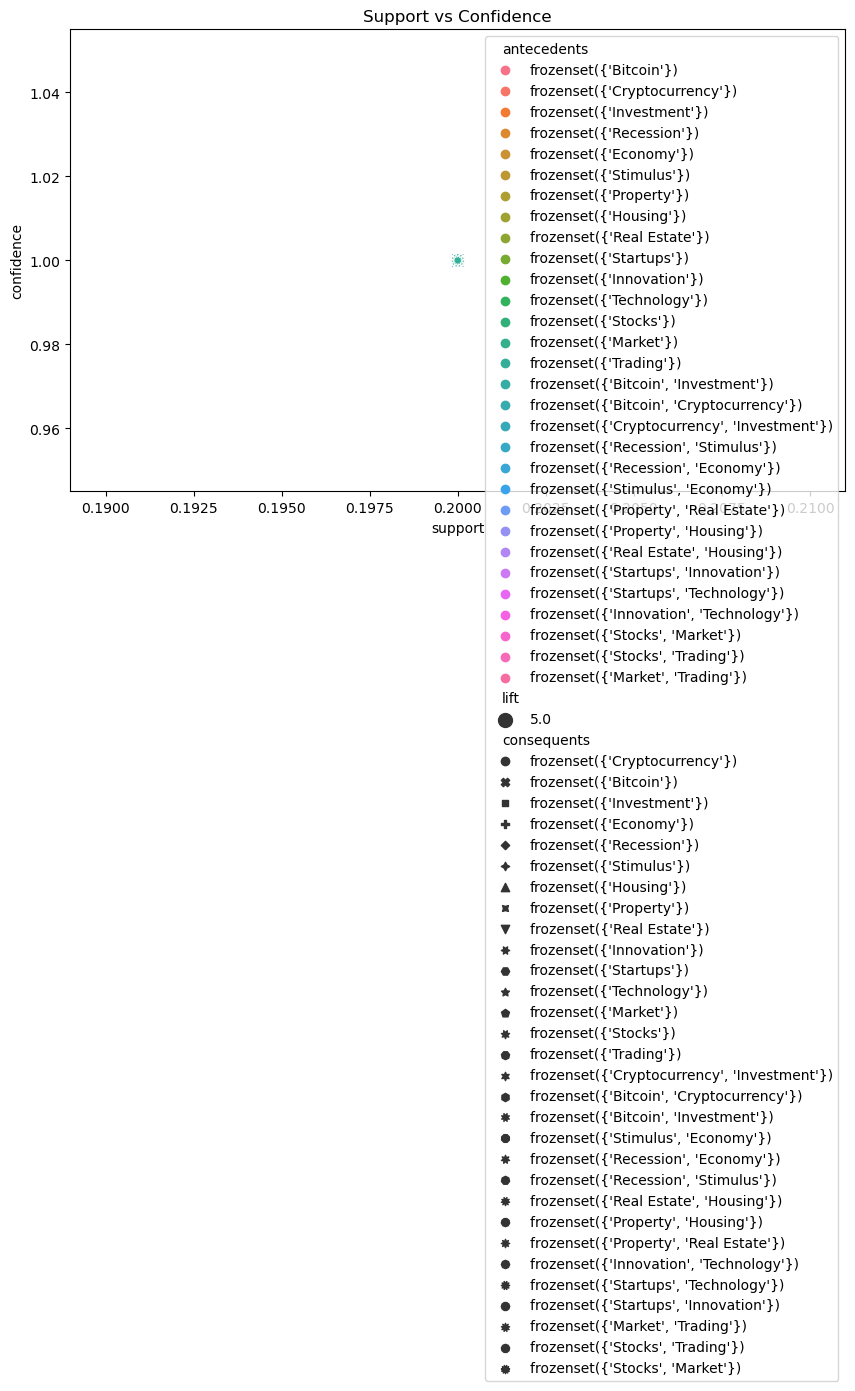

In [7]:
# Visualizing the Support vs Confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="antecedents", style="consequents", sizes=(100, 400))
plt.title('Support vs Confidence')
plt.show()

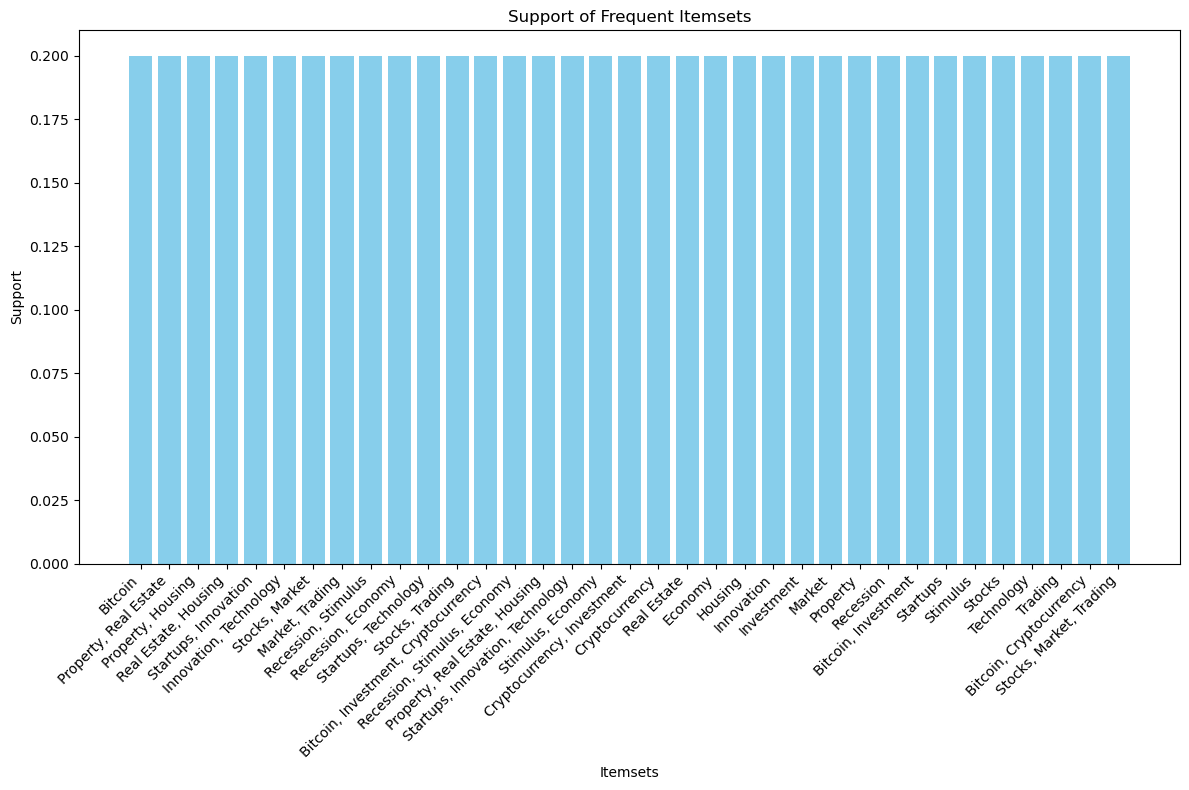

In [8]:
# Plotting the frequent itemsets
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(frequent_itemsets['itemsets'], frequent_itemsets['support'], color='skyblue')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Support of Frequent Itemsets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

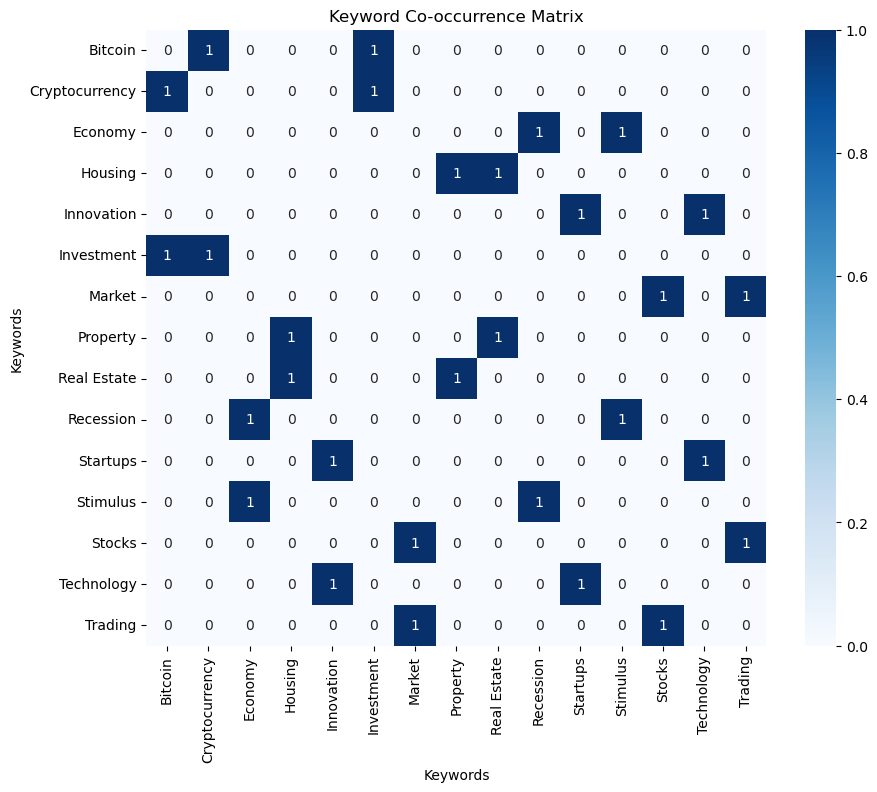

In [11]:
import numpy as np

# Transaction Encoder to convert data into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Create a co-occurrence matrix
co_occurrence_matrix = np.dot(df.T, df)
np.fill_diagonal(co_occurrence_matrix, 0)  # Optional: Set diagonal to 0 to ignore self-co-occurrence

# Convert matrix to DataFrame for better handling
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=df.columns, columns=df.columns)

# Plotting the co-occurrence matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_df, annot=True, cmap='Blues', fmt='g')
plt.title('Keyword Co-occurrence Matrix')
plt.xlabel('Keywords')
plt.ylabel('Keywords')
plt.show()